Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [6]:
import requests
import pandas as pd
import numpy as np

In [13]:
van_bike_data = pd.read_csv('../data/van_bike_data.csv', encoding='unicode_escape')

In [25]:
van_bar_data=pd.read_csv('../data/bars_4square.csv',encoding='unicode_escape')

In [26]:
bars_yelp=pd.read_csv('../data/bars_yelp.csv',encoding='unicode_escape')

In [27]:
Bike_Foursquare = pd.merge(van_bike_data,van_bar_data, on=["ll", "ll"])

In [59]:
Bike_Foursquare_Yelp=pd.merge(Bike_Foursquare,bars_yelp, on=["ll", "ll"])
Bike_Foursquare_Yelp

,free_bikes,name,ll,no_of_bars_square,avg_rating,avg_review,avg_distance,no_of_bars_yelp
0,21,10th & Cambie,"49.262487,-123.114397",50,3.73,100.29,891.97,28
1,9,Yaletown-Roundhouse Station,"49.274566,-123.121817",50,3.70,98.74,482.66,50
2,13,Dunsmuir & Beatty,"49.279764,-123.110154",50,3.88,152.90,569.80,50
3,2,12th & Yukon (City Hall),"49.260599,-123.113504",50,3.78,81.73,902.70,30
4,9,8th & Ash,"49.264215,-123.117772",50,3.45,138.09,640.18,11
...,...,...,...,...,...,...,...,...
236,11,Heather & 29th,"49.245535,-123.120496",4,4.00,1.00,942.16,1
237,16,Cardero & Robson,"49.289255,-123.132677",50,3.62,146.94,729.72,50
238,0,Commercial & 20th,"49.252656,-123.067965",11,0.00,0.00,0.00,0
239,2,Hornby & Drake,"49.277527,-123.129464",50,3.60,129.14,537.85,50


In [60]:
Bike_Foursquare_Yelp.to_csv('../data/Bike_Foursquare_Yelp.csv',index=False)

##  EDA Process
Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
BFY=Bike_Foursquare_Yelp
BFY.shape

(241, 8)

In [64]:
BFY.dtypes

free_bikes             int64
name                  object
ll                    object
no_of_bars_square      int64
avg_rating           float64
avg_review           float64
avg_distance         float64
no_of_bars_yelp        int64
dtype: object

### - Descriptive analysis
First of all, let's take a look at the distribution of number of bars.

<AxesSubplot:xlabel='free_bikes', ylabel='Count'>

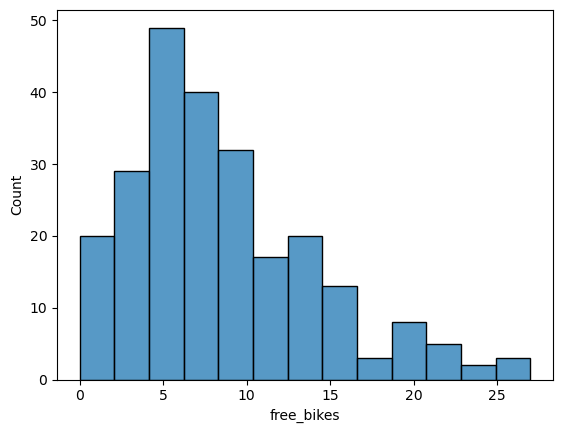

In [65]:
# descriptive statistics
BFY['free_bikes'].describe()
# histogram
sns.histplot(BFY['free_bikes'])

we can observe the following things:

The distribution of free bikes slightly deviates from a normal distribution. - It's right skewed. 

___________________________________

In the following distribution tables, we are comparing number of bars derived from foursquare API vs Yelp API

<AxesSubplot:xlabel='no_of_bars_square', ylabel='Count'>

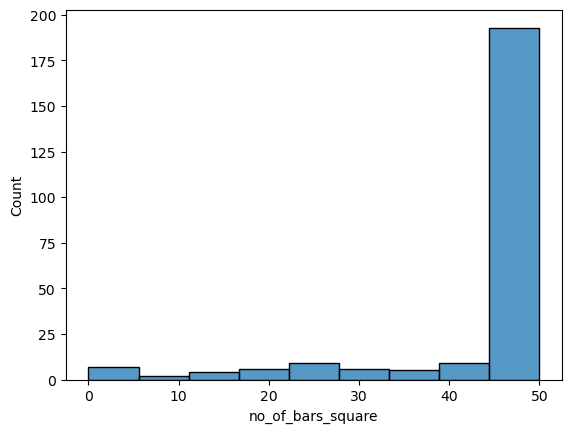

In [66]:
# descriptive statistics for number of bars derived from foursquare API
BFY['no_of_bars_square'].describe()
# histogram
sns.histplot(BFY['no_of_bars_square'])

<AxesSubplot:xlabel='no_of_bars_yelp', ylabel='Count'>

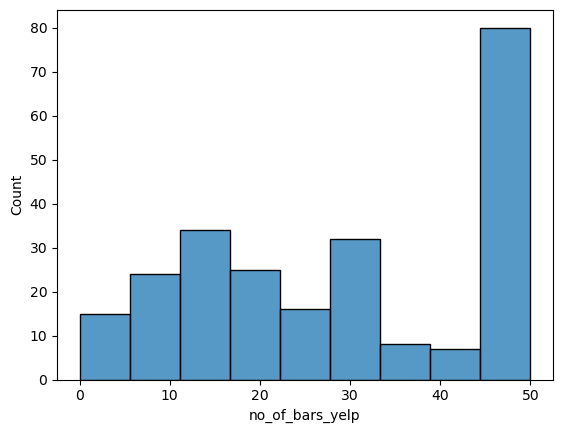

In [68]:
# # descriptive statistics for number of bars derived from Yelp API

BFY['no_of_bars_yelp'].describe()
# histogram
sns.histplot(BFY['no_of_bars_yelp'])

____________________________________
### - Relationship Between the Number of Free bikes & Predictors

Now we would look at the relationship between number of free bikes vs number of bars in each location derived from Yelp

<AxesSubplot:xlabel='no_of_bars_yelp', ylabel='free_bikes'>

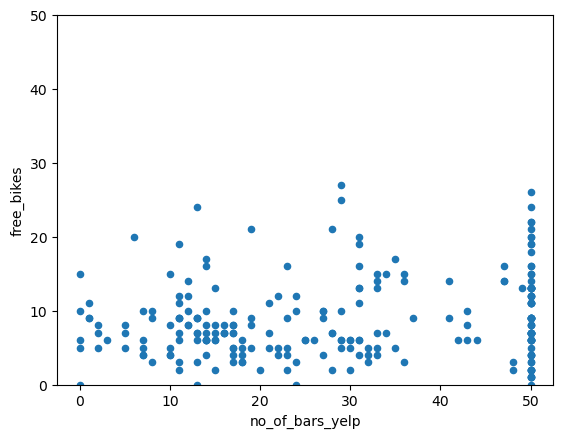

In [50]:
# scatter plot no_of_bars_yelp vs. free_bikes
var = 'no_of_bars_yelp'
data = BFY[['free_bikes',var]]
data.plot.scatter(x=var, y='free_bikes', ylim=(0,50))

______________________
### - Multivariate Analysis
In this analysis we would take a look at the number of free bikes and all other numberical variables

<AxesSubplot:>

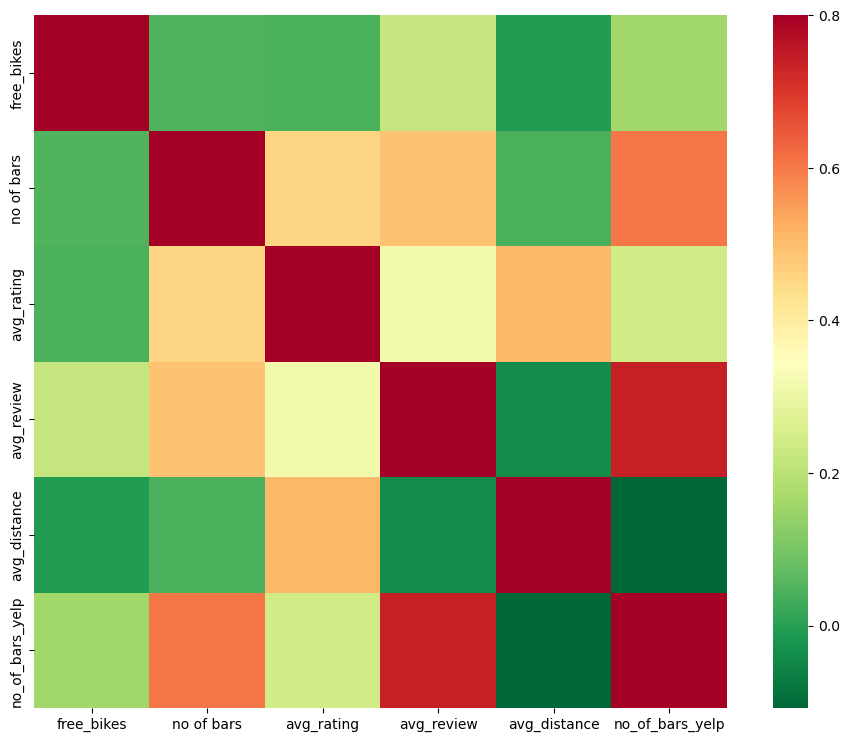

In [54]:
# correlation matrix
corrmat = BFY.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True,cmap="RdYlGn_r")

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [30]:
import sqlite3
from sqlite3 import Error

def create_connection(path):
    connection = None
    try:
        connection = sqlite3.connect(path)
        print("Connection to SQLite DB successful")
    except Error as e:
        print(f"The error '{e}' occurred")

    return connection

In [31]:
connection = create_connection("../data/sm_app.sqlite")
connection

Connection to SQLite DB successful


In [32]:
# load the bars_yelp.csv into a Pandas DataFrame
bars_yelp = pd.read_csv('../data/bars_yelp.csv')

# write the data to a sqlite table
bars_yelp.to_sql('bars_yelp', connection, if_exists='append', index = False)

241

In [33]:
# load the bars_yelp.csv into a Pandas DataFrame
van_bike_data = pd.read_csv('../data/van_bike_data.csv')

# write the data to a sqlite table
van_bike_data.to_sql('van_bike_data', connection, if_exists='append', index = False)

241

In [34]:
# load the bars_yelp.csv into a Pandas DataFrame
bars_4square = pd.read_csv('../data/bars_4square.csv')

# write the data to a sqlite table
bars_4square.to_sql('bars_4square', connection, if_exists='append', index = False)

241